In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/chess/king-rook-vs-king-pawn/kr-vs-kp.data',
                 names=["bkblk","bknwy","bkon8","bkona","bkspr","bkxbq","bkxcr","bkxwp","blxwp","bxqsq","cntxt","dsopp","dwipd",
                "hdchk","katri","mulch","qxmsq","r2ar8","reskd","reskr","rimmx","rkxwp","rxmsq","simpl","skach","skewr",
                "skrxp","spcop","stlmt","thrsk","wkcti","wkna8","wknck","wkovl","wkpos","wtoeg","outcome"],header=None) 

dataset

bkblk bknwy bkon8 bkona bkspr bkxbq bkxcr bkxwp blxwp bxqsq  ... spcop  \
0        f     f     f     f     f     f     f     f     f     f  ...     f   
1        f     f     f     f     t     f     f     f     f     f  ...     f   
2        f     f     f     f     t     f     t     f     f     f  ...     f   
3        f     f     f     f     f     f     f     f     t     f  ...     f   
4        f     f     f     f     f     f     f     f     f     f  ...     f   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
3191     t     f     f     f     f     f     t     f     f     f  ...     f   
3192     t     f     f     f     f     f     t     f     f     f  ...     f   
3193     t     f     f     f     f     f     t     f     f     f  ...     f   
3194     t     f     t     f     f     f     t     f     f     f  ...     f   
3195     t     f     t     f     f     f     t     f     f     f  ...     f   

     stlmt thrsk wkcti wkna8 wknck wkovl wkpos wtoeg outcome  
0        f     f     f     f     f     t     t     n     won  
1        f     f     f     f     f     t     t     n     won  
2        f     f     f     f     f     t     t     n     won  
3        f     f     f     f     f     t     t     n     won  
4        f     f     f     f     f     t     t     n     won  
...    ...   ...   ...   ...   ...   ...   ...   ...     ...  
3191     t     f     f     t     f     t     f     n   nowin  
3192     t     f     f     t     f     t     f     n   nowin  
3193     t     f     f     t     f     t     f     n   nowin  
3194     t     f     f     t     f     f     f     n   nowin  
3195     t     f     f     t     f     f     f     n   nowin  

[3196 rows x 37 columns]

In [ ]:
dataset.shape

(3196, 37)

In [ ]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (2876, 37)
Unseen Data For Predictions: (320, 37)


In [ ]:
from pycaret.classification import *
exp_mclf101 = setup(data = data, target = 'outcome', session_id=123) 

Description             Value
0                               session_id               123
1                                   Target           outcome
2                              Target Type            Binary
3                            Label Encoded  nowin: 0, won: 1
4                            Original Data        (2876, 37)
5                           Missing Values             False
6                         Numeric Features                 0
7                     Categorical Features                36
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set        (2013, 38)
12                    Transformed Test Set         (863, 38)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              abf2
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='outcome',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [ ]:
best = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
dt               Decision Tree Classifier    0.9930  0.9929  0.9962  0.9905   
lightgbm  Light Gradient Boosting Machine    0.9915  0.9996  0.9933  0.9904   
et                 Extra Trees Classifier    0.9891  0.9975  0.9894  0.9895   
rf               Random Forest Classifier    0.9876  0.9982  0.9894  0.9866   
gbc          Gradient Boosting Classifier    0.9811  0.9981  0.9750  0.9884   
ada                  Ada Boost Classifier    0.9662  0.9950  0.9711  0.9639   
lr                    Logistic Regression    0.9593  0.9928  0.9634  0.9583   
svm                   SVM - Linear Kernel    0.9553  0.0000  0.9471  0.9668   
knn                K Neighbors Classifier    0.9409  0.9793  0.9577  0.9303   
lda          Linear Discriminant Analysis    0.9359  0.9842  0.9596  0.9202   
ridge                    Ridge Classifier    0.9349  0.0000  0.9586  0.9194   
nb                            Naive Bayes    0.6140  0.8965  0.9865  0.5738   
qda       Quadratic Discriminant Analysis    0.5509  0.6212  0.9962  0.5353   
dummy                    Dummy Classifier    0.5161  0.5000  1.0000  0.5161   

              F1   Kappa     MCC  TT (Sec)  
dt        0.9933  0.9861  0.9861     0.015  
lightgbm  0.9918  0.9831  0.9831     0.111  
et        0.9894  0.9781  0.9782     0.471  
rf        0.9880  0.9751  0.9752     0.501  
gbc       0.9816  0.9622  0.9625     0.166  
ada       0.9674  0.9324  0.9327     0.107  
lr        0.9607  0.9184  0.9187     0.463  
svm       0.9560  0.9106  0.9122     0.017  
knn       0.9436  0.8815  0.8822     0.123  
lda       0.9393  0.8715  0.8727     0.020  
ridge     0.9384  0.8695  0.8708     0.014  
nb        0.7254  0.2080  0.3226     0.014  
qda       0.6962  0.0741  0.1805     0.018  
dummy     0.6809  0.0000  0.0000     0.013

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.9901  0.9898  1.0000  0.9811  0.9905  0.9802  0.9804
2       0.9950  0.9949  1.0000  0.9905  0.9952  0.9901  0.9901
3       0.9801  0.9801  0.9808  0.9808  0.9808  0.9602  0.9602
4       0.9950  0.9948  1.0000  0.9905  0.9952  0.9900  0.9901
5       0.9851  0.9849  0.9904  0.9810  0.9856  0.9701  0.9702
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.9900  0.9900  0.9904  0.9904  0.9904  0.9801  0.9801
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       0.9950  0.9949  1.0000  0.9904  0.9952  0.9900  0.9901
Mean    0.9930  0.9929  0.9962  0.9905  0.9933  0.9861  0.9861
Std     0.0064  0.0064  0.0064  0.0074  0.0061  0.0128  0.0127

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [ ]:
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [ ]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.9505  0.9833  0.9808  0.9273  0.9533  0.9007  0.9023
1       0.9406  0.9687  0.9615  0.9259  0.9434  0.8809  0.8816
2       0.9554  0.9870  0.9808  0.9358  0.9577  0.9107  0.9118
3       0.9104  0.9778  0.9519  0.8839  0.9167  0.8202  0.8228
4       0.9403  0.9793  0.9327  0.9510  0.9417  0.8805  0.8807
5       0.9303  0.9835  0.9423  0.9245  0.9333  0.8604  0.8606
6       0.9552  0.9822  0.9615  0.9524  0.9569  0.9103  0.9104
7       0.9303  0.9656  0.9423  0.9245  0.9333  0.8604  0.8606
8       0.9353  0.9821  0.9519  0.9252  0.9384  0.8704  0.8707
9       0.9602  0.9836  0.9709  0.9524  0.9615  0.9203  0.9205
Mean    0.9409  0.9793  0.9577  0.9303  0.9436  0.8815  0.8822
Std     0.0144  0.0065  0.0156  0.0192  0.0133  0.0289  0.0285

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


In [ ]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [ ]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.9554  0.9929  0.9615  0.9524  0.9569  0.9108  0.9108
1       0.9703  0.9895  0.9615  0.9804  0.9709  0.9406  0.9408
2       0.9604  0.9936  0.9423  0.9800  0.9608  0.9208  0.9215
3       0.9602  0.9928  0.9519  0.9706  0.9612  0.9204  0.9205
4       0.9552  0.9930  0.9615  0.9524  0.9569  0.9103  0.9104
5       0.9602  0.9923  0.9712  0.9528  0.9619  0.9202  0.9204
6       0.9602  0.9980  0.9712  0.9528  0.9619  0.9202  0.9204
7       0.9403  0.9838  0.9712  0.9182  0.9439  0.8802  0.8818
8       0.9701  0.9961  0.9712  0.9712  0.9712  0.9402  0.9402
9       0.9602  0.9961  0.9709  0.9524  0.9615  0.9203  0.9205
Mean    0.9593  0.9928  0.9634  0.9583  0.9607  0.9184  0.9187
Std     0.0080  0.0038  0.0094  0.0175  0.0073  0.0160  0.0157

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
print(lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
tuned_dt = tune_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.9554  0.9939  0.9327  0.9798  0.9557  0.9109  0.9121
1       0.9703  0.9908  0.9519  0.9900  0.9706  0.9406  0.9413
2       0.9257  0.9894  0.8654  0.9890  0.9231  0.8519  0.8590
3       0.9353  0.9880  0.9712  0.9099  0.9395  0.8702  0.8723
4       0.9204  0.9911  0.9615  0.8929  0.9259  0.8402  0.8429
5       0.9403  0.9877  0.9808  0.9107  0.9444  0.8801  0.8829
6       0.9403  0.9916  0.9135  0.9694  0.9406  0.8807  0.8823
7       0.9502  0.9858  0.9519  0.9519  0.9519  0.9004  0.9004
8       0.9602  0.9936  0.9327  0.9898  0.9604  0.9205  0.9221
9       0.9254  0.9872  0.9709  0.8929  0.9302  0.8503  0.8538
Mean    0.9424  0.9899  0.9432  0.9476  0.9442  0.8846  0.8869
Std     0.0156  0.0026  0.0326  0.0395  0.0147  0.0313  0.0301

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [ ]:
import numpy as np
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.9505  0.9941  0.9808  0.9273  0.9533  0.9007  0.9023
1       0.9158  0.9699  0.9423  0.8991  0.9202  0.8313  0.8323
2       0.9554  0.9914  0.9808  0.9358  0.9577  0.9107  0.9118
3       0.9403  0.9834  0.9423  0.9423  0.9423  0.8805  0.8805
4       0.9602  0.9888  0.9904  0.9364  0.9626  0.9201  0.9218
5       0.9602  0.9890  0.9712  0.9528  0.9619  0.9202  0.9204
6       0.9154  0.9784  0.9327  0.9065  0.9194  0.8305  0.8308
7       0.9353  0.9640  0.9519  0.9252  0.9384  0.8704  0.8707
8       0.9502  0.9862  0.9904  0.9196  0.9537  0.9001  0.9030
9       0.9453  0.9888  0.9806  0.9182  0.9484  0.8903  0.8925
Mean    0.9429  0.9834  0.9663  0.9263  0.9458  0.8855  0.8866
Std     0.0156  0.0093  0.0207  0.0155  0.0149  0.0312  0.0315

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_lr = tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.9703  0.9948  0.9615  0.9804  0.9709  0.9406  0.9408
1       0.9752  0.9911  0.9615  0.9901  0.9756  0.9505  0.9509
2       0.9752  0.9956  0.9519  1.0000  0.9754  0.9505  0.9517
3       0.9602  0.9941  0.9615  0.9615  0.9615  0.9203  0.9203
4       0.9602  0.9944  0.9712  0.9528  0.9619  0.9202  0.9204
5       0.9751  0.9932  0.9808  0.9714  0.9761  0.9502  0.9502
6       0.9801  0.9985  0.9808  0.9808  0.9808  0.9602  0.9602
7       0.9602  0.9860  0.9808  0.9444  0.9623  0.9202  0.9209
8       0.9751  0.9970  0.9712  0.9806  0.9758  0.9502  0.9503
9       0.9602  0.9967  0.9612  0.9612  0.9612  0.9203  0.9203
Mean    0.9692  0.9941  0.9682  0.9723  0.9701  0.9383  0.9386
Std     0.0077  0.0034  0.0097  0.0164  0.0072  0.0154  0.0154

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:LogisticRegression(C=8.866, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


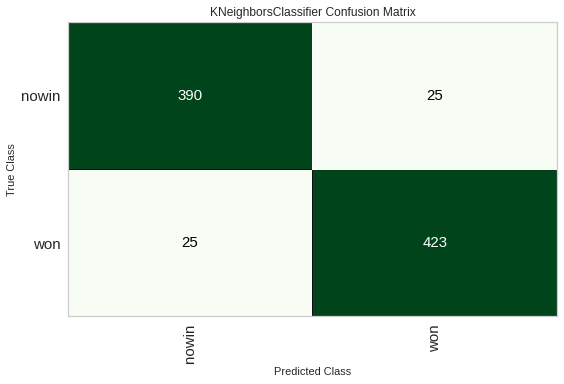

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_knn, plot = 'confusion_matrix')


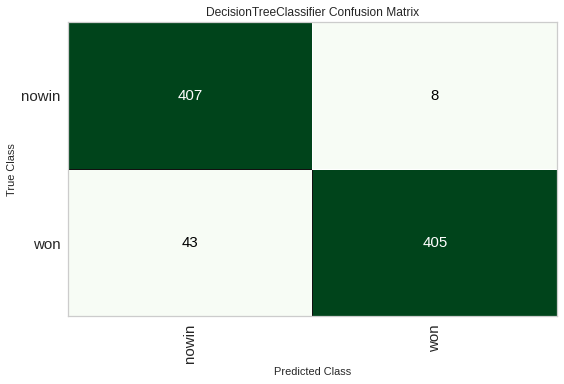

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_dt, plot = 'confusion_matrix')

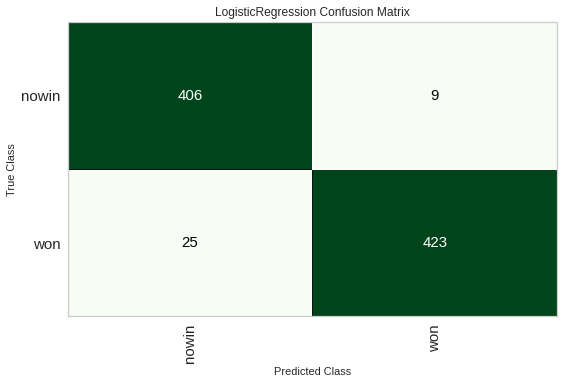

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lr, plot = 'confusion_matrix')

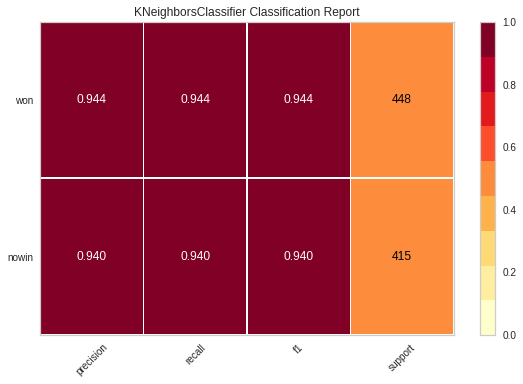

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_knn, plot = 'class_report')

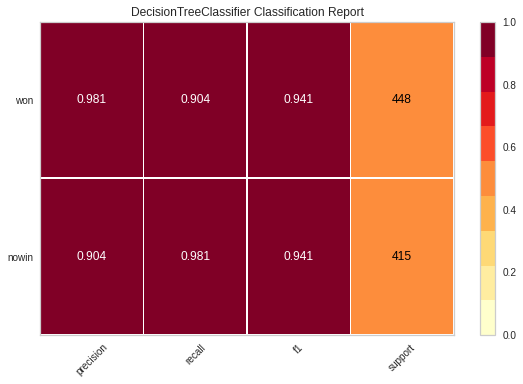

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_dt, plot = 'class_report')

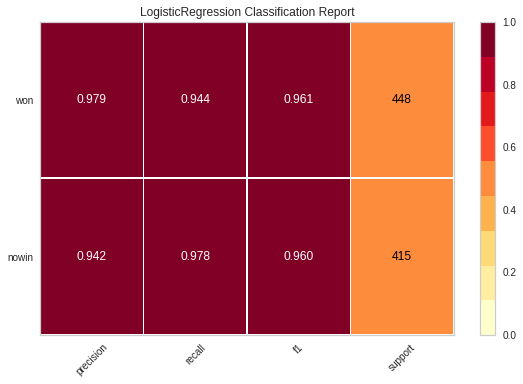

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lr, plot = 'class_report')

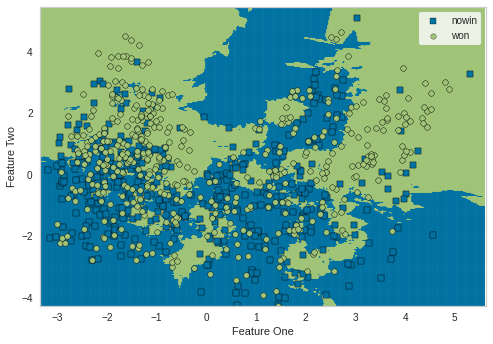

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_knn, plot='boundary')

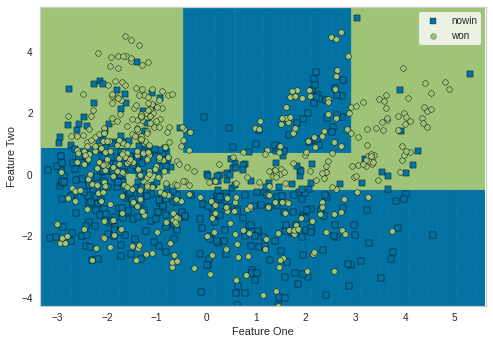

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_dt, plot='boundary')

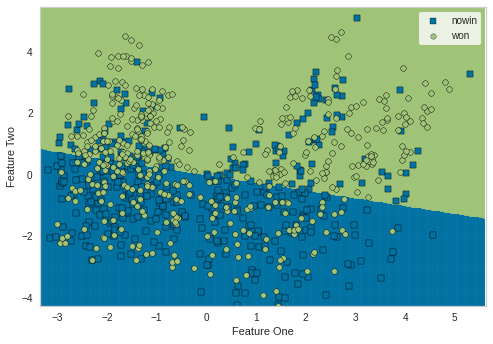

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lr, plot='boundary')

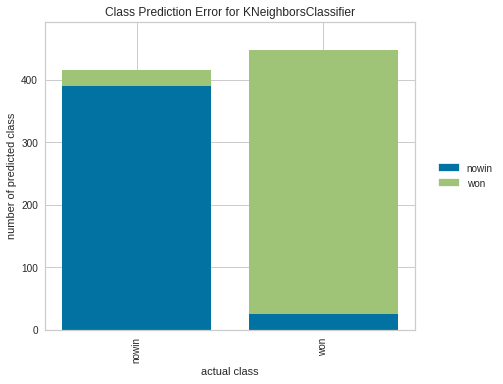

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_knn, plot = 'error')

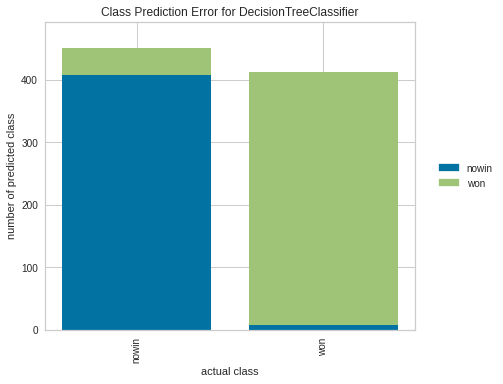

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_dt, plot = 'error')

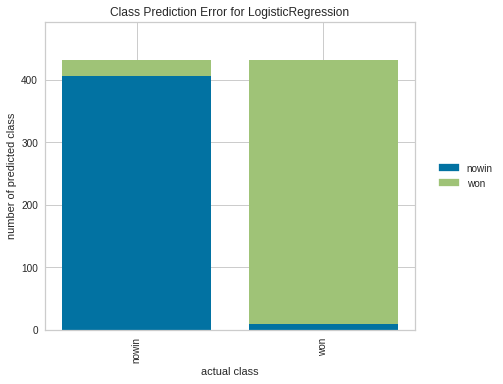

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lr, plot = 'error')

In [ ]:
evaluate_model(tuned_knn)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
predict_model(tuned_knn);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='uniform'), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model  Accuracy     AUC  Recall   Prec.      F1  Kappa  \
0  K Neighbors Classifier    0.9421  0.9837  0.9442  0.9442  0.9442  0.884   

     MCC  
0  0.884

In [ ]:
final_knn = finalize_model(tuned_knn)
print(final_knn)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='uniform'), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='uniform')
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='uniform'), fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, verbose=False, system=False, metrics=None, experiment_custom

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='uniform')


In [ ]:
unseen_predictions = predict_model(final_knn, data=data_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='uniform'), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model  Accuracy     AUC  Recall  Prec.  F1  Kappa  MCC
0  K Neighbors Classifier         0  0.9972       0      0   0      0    0

bkblk bknwy bkon8 bkona bkspr bkxbq bkxcr bkxwp blxwp bxqsq  ... thrsk  \
0     f     f     f     f     f     f     f     f     f     f  ...     t   
1     f     f     f     f     f     f     f     f     t     f  ...     f   
2     f     f     f     f     f     f     f     f     t     f  ...     f   
3     f     f     f     f     t     f     t     f     f     f  ...     f   
4     f     f     f     f     f     f     f     f     t     f  ...     f   

  wkcti wkna8 wknck wkovl wkpos wtoeg outcome Label   Score  
0     f     f     f     t     t     n     won   won  0.8235  
1     f     f     f     t     t     n     won   won  0.7647  
2     t     f     f     t     t     n     won   won  0.6471  
3     f     f     f     t     t     n     won   won  0.8235  
4     f     f     f     t     t     n     won   won  0.7059  

[5 rows x 39 columns]

In [ ]:
save_model(final_knn,'Final KNN Model 031NOV2022')
saved_final_knn = load_model('Final KNN Model 031NOV2022')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='uniform'), model_name=Final KNN Model 031NOV2022, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='outcome',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                num

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


In [ ]:
new_prediction = predict_model(saved_final_knn, data=data_unseen)
new_prediction.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='outcome',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('fix_perfect', Remove_100(target='outcome')),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                

Model  Accuracy     AUC  Recall  Prec.  F1  Kappa  MCC
0  K Neighbors Classifier         0  0.9972       0      0   0      0    0

bkblk bknwy bkon8 bkona bkspr bkxbq bkxcr bkxwp blxwp bxqsq  ... thrsk  \
0     f     f     f     f     f     f     f     f     f     f  ...     t   
1     f     f     f     f     f     f     f     f     t     f  ...     f   
2     f     f     f     f     f     f     f     f     t     f  ...     f   
3     f     f     f     f     t     f     t     f     f     f  ...     f   
4     f     f     f     f     f     f     f     f     t     f  ...     f   

  wkcti wkna8 wknck wkovl wkpos wtoeg outcome Label   Score  
0     f     f     f     t     t     n     won   won  0.8235  
1     f     f     f     t     t     n     won   won  0.7647  
2     t     f     f     t     t     n     won   won  0.6471  
3     f     f     f     t     t     n     won   won  0.8235  
4     f     f     f     t     t     n     won   won  0.7059  

[5 rows x 39 columns]

In [ ]:
evaluate_model(tuned_dt)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
predict_model(tuned_dt);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model  Accuracy     AUC  Recall   Prec.      F1  Kappa  \
0  Decision Tree Classifier    0.9409  0.9898   0.904  0.9806  0.9408  0.882   

      MCC  
0  0.8849

In [ ]:
final_dt = finalize_model(tuned_dt)
print(final_dt)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='depr

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [ ]:
unseen_predictions = predict_model(final_dt, data=data_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model  Accuracy     AUC  Recall  Prec.  F1  Kappa  MCC
0  Decision Tree Classifier         0  0.9938       0      0   0      0    0

bkblk bknwy bkon8 bkona bkspr bkxbq bkxcr bkxwp blxwp bxqsq  ... thrsk  \
0     f     f     f     f     f     f     f     f     f     f  ...     t   
1     f     f     f     f     f     f     f     f     t     f  ...     f   
2     f     f     f     f     f     f     f     f     t     f  ...     f   
3     f     f     f     f     t     f     t     f     f     f  ...     f   
4     f     f     f     f     f     f     f     f     t     f  ...     f   

  wkcti wkna8 wknck wkovl wkpos wtoeg outcome Label   Score  
0     f     f     f     t     t     n     won   won  0.8967  
1     f     f     f     t     t     n     won   won  0.8967  
2     t     f     f     t     t     n     won   won  0.8967  
3     f     f     f     t     t     n     won   won  0.8967  
4     f     f     f     t     t     n     won   won  0.8967  

[5 rows x 39 columns]

In [ ]:
save_model(final_dt,'Final DT Model 031NOV2022')
saved_final_dt = load_model('Final DT Model 031NOV2022')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), model_name=Final DT Model 031NOV2022, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='outcome',
                                      time_features=[])),
             

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


In [ ]:
new_prediction = predict_model(saved_final_dt, data=data_unseen)
new_prediction.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='outcome',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('dfs', 'passthrough'), ('pca', 'passthrough'),
                ['trained_model',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        cr

Model  Accuracy     AUC  Recall  Prec.  F1  Kappa  MCC
0  Decision Tree Classifier         0  0.9938       0      0   0      0    0

bkblk bknwy bkon8 bkona bkspr bkxbq bkxcr bkxwp blxwp bxqsq  ... thrsk  \
0     f     f     f     f     f     f     f     f     f     f  ...     t   
1     f     f     f     f     f     f     f     f     t     f  ...     f   
2     f     f     f     f     f     f     f     f     t     f  ...     f   
3     f     f     f     f     t     f     t     f     f     f  ...     f   
4     f     f     f     f     f     f     f     f     t     f  ...     f   

  wkcti wkna8 wknck wkovl wkpos wtoeg outcome Label   Score  
0     f     f     f     t     t     n     won   won  0.8967  
1     f     f     f     t     t     n     won   won  0.8967  
2     t     f     f     t     t     n     won   won  0.8967  
3     f     f     f     t     t     n     won   won  0.8967  
4     f     f     f     t     t     n     won   won  0.8967  

[5 rows x 39 columns]

In [ ]:
evaluate_model(tuned_lr)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=8.866, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
predict_model(tuned_lr);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LogisticRegression(C=8.866, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model  Accuracy     AUC  Recall   Prec.      F1   Kappa  \
0  Logistic Regression    0.9606  0.9913  0.9442  0.9792  0.9614  0.9212   

      MCC  
0  0.9218

In [ ]:
final_lr = finalize_model(tuned_lr)
print(final_lr)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LogisticRegression(C=8.866, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing LogisticRegression(C=8.866, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=LogisticRegression(C=8.866, class_weight='balanc

LogisticRegression(C=8.866, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
unseen_predictions = predict_model(final_lr, data=data_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LogisticRegression(C=8.866, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model  Accuracy     AUC  Recall  Prec.  F1  Kappa  MCC
0  Logistic Regression         0  0.9977       0      0   0      0    0

bkblk bknwy bkon8 bkona bkspr bkxbq bkxcr bkxwp blxwp bxqsq  ... thrsk  \
0     f     f     f     f     f     f     f     f     f     f  ...     t   
1     f     f     f     f     f     f     f     f     t     f  ...     f   
2     f     f     f     f     f     f     f     f     t     f  ...     f   
3     f     f     f     f     t     f     t     f     f     f  ...     f   
4     f     f     f     f     f     f     f     f     t     f  ...     f   

  wkcti wkna8 wknck wkovl wkpos wtoeg outcome Label   Score  
0     f     f     f     t     t     n     won   won  0.8387  
1     f     f     f     t     t     n     won   won  0.8281  
2     t     f     f     t     t     n     won   won  0.8520  
3     f     f     f     t     t     n     won   won  0.7744  
4     f     f     f     t     t     n     won   won  0.8156  

[5 rows x 39 columns]

In [ ]:
save_model(final_lr,'Final LR Model 031NOV2022')
saved_final_lr = load_model('Final LR Model 031NOV2022')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=LogisticRegression(C=8.866, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model_name=Final LR Model 031NOV2022, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='outcome',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
        

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


In [ ]:
new_prediction = predict_model(saved_final_lr, data=data_unseen)
new_prediction.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='outcome',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                ('dfs', 'passthrough'), ('pca', 'passthrough'),
                ['trained_model',
                 LogisticRegression

Model  Accuracy     AUC  Recall  Prec.  F1  Kappa  MCC
0  Logistic Regression         0  0.9977       0      0   0      0    0

bkblk bknwy bkon8 bkona bkspr bkxbq bkxcr bkxwp blxwp bxqsq  ... thrsk  \
0     f     f     f     f     f     f     f     f     f     f  ...     t   
1     f     f     f     f     f     f     f     f     t     f  ...     f   
2     f     f     f     f     f     f     f     f     t     f  ...     f   
3     f     f     f     f     t     f     t     f     f     f  ...     f   
4     f     f     f     f     f     f     f     f     t     f  ...     f   

  wkcti wkna8 wknck wkovl wkpos wtoeg outcome Label   Score  
0     f     f     f     t     t     n     won   won  0.8387  
1     f     f     f     t     t     n     won   won  0.8281  
2     t     f     f     t     t     n     won   won  0.8520  
3     f     f     f     t     t     n     won   won  0.7744  
4     f     f     f     t     t     n     won   won  0.8156  

[5 rows x 39 columns]